In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ..

/Share/home/shibinbin/projects/exRNA


In [41]:
import pandas as pd
import seaborn as sns
sns.set()
from functools import reduce
from matplotlib_venn import venn3, venn3_circles

In [61]:
venn3?

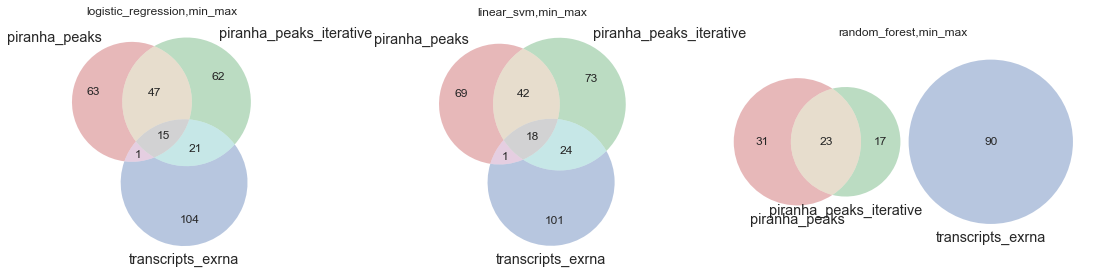

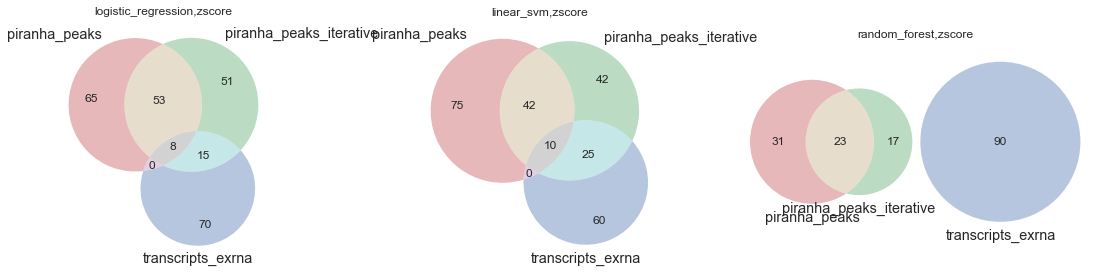

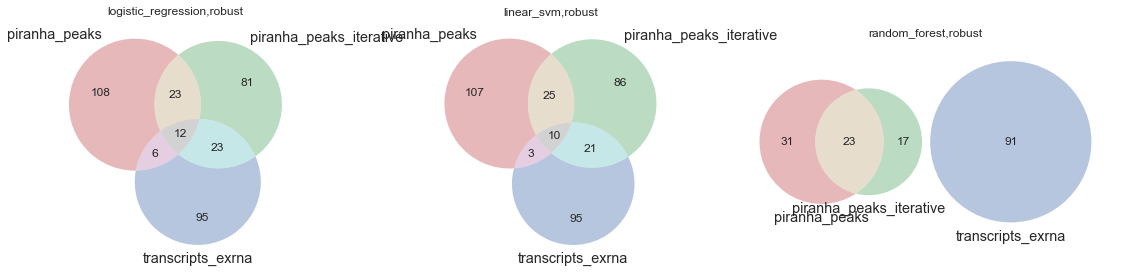

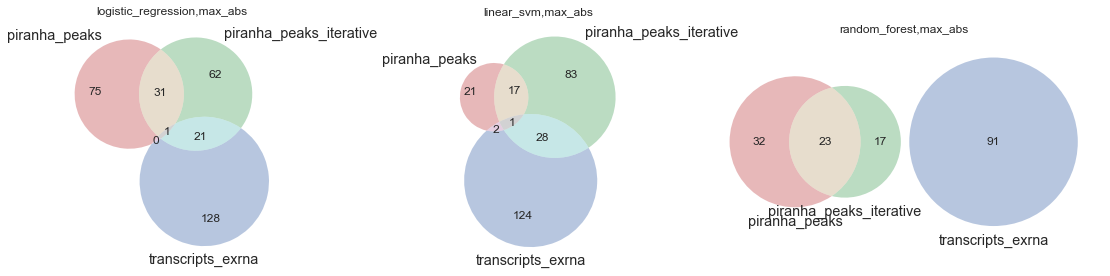

In [79]:
features = {}
transcripts = {}
scaler = 'min_max'
datasets = ['piranha_peaks', 'piranha_peaks_iterative', 'transcripts_exrna']
feature_importances = {}
for scaler in ('min_max', 'zscore', 'robust', 'max_abs'):
    fig, axes = plt.subplots(1, 3, figsize=(16, 4))
    for i_ax, classifier in enumerate(('logistic_regression', 'linear_svm', 'random_forest')):
        for dataset in datasets:
            features[dataset] = pd.read_table('output/feature_selection/select_robust/{}/{}.{}.100.0.jackknife/features.txt'.format(dataset, scaler, classifier),
                                             header=None).iloc[:, 0]
            transcripts[dataset] = features[dataset].str.split('|', expand=True).loc[:, 1].unique()
            feature_importances[dataset] = pd.read_table('output/feature_selection/select_robust/{}/{}.{}.100.0.jackknife/feature_importances.txt'.format(dataset, scaler, classifier),
                                           header=None, names=['feature', 'importance'])
            feature_info = feature_importances[dataset].loc[:, 'feature'].str.split('|', expand=True)
            feature_info.columns = ['peak', 'transcript_id', 'rna_type']
            feature_importances[dataset] = pd.concat([feature_importances[dataset], feature_info['transcript_id']], axis=1).drop(columns=['feature'])
            feature_importances[dataset] = feature_importances[dataset].groupby('transcript_id', as_index=False).sum()

        transcripts_union = reduce(np.union1d, transcripts.values())
        transcripts_intersect = reduce(np.intersect1d, transcripts.values())
        transcripts_matrix = pd.DataFrame(np.zeros((len(transcripts_union), len(datasets)), dtype=np.int32),
                                         index=transcripts_union, columns=datasets)
        for dataset in datasets:
            transcripts_matrix.loc[transcripts[dataset], dataset] = 1

        ax = axes[i_ax]
        venn3(subsets=[set(a) for a in transcripts.values()],
              set_labels=list(transcripts.keys()), ax=ax)
        ax.set_title(classifier + ',' + scaler)
    plt.tight_layout()

In [82]:
transcripts_intersect

array([], dtype=object)

In [89]:
scaler = 'robust'
classifier = 'logistic_regression'
for dataset in datasets:
    features[dataset] = pd.read_table('output/feature_selection/select_robust/{}/{}.{}.100.0.jackknife/features.txt'.format(dataset, scaler, classifier),
                                     header=None).iloc[:, 0]
    transcripts[dataset] = features[dataset].str.split('|', expand=True).loc[:, 1].unique()
    feature_importances[dataset] = pd.read_table('output/feature_selection/select_robust/{}/{}.{}.100.0.jackknife/feature_importances.txt'.format(dataset, scaler, classifier),
                                   header=None, names=['feature', 'importance'])
    feature_info = feature_importances[dataset].loc[:, 'feature'].str.split('|', expand=True)
    feature_info.columns = ['peak', 'transcript_id', 'rna_type']
    feature_importances[dataset] = pd.concat([feature_importances[dataset], feature_info['transcript_id']], axis=1).drop(columns=['feature'])
    feature_importances[dataset] = feature_importances[dataset].groupby('transcript_id', as_index=False).sum()

transcripts_union = reduce(np.union1d, transcripts.values())
transcripts_intersect = reduce(np.intersect1d, transcripts.values())

In [90]:
print('\n'.join(transcripts['transcripts_exrna']))

MIR105-1-201
MIR105-2-201
MIR767-201
SNORD74B-201
T235822
T143021
LINC00273-201
CHD1L-209
IGF2-205
MIR3161-201
T235825
HPX-212
HPX-210
HPX-202
SNORA31.11-201
CHD1L-204
CPEB1-216
piR-hsa-1245
RNU4-2-201
SEZ6L2-209
AC011603.2-201
TK1-201
ATP5H-205
TK1-203
NCKAP5L-204
piR-hsa-23655
piR-hsa-18286
CHD1L-203
ALB-212
IGF2-203
HPX-208
KRT14-201
TMEM107-205
SNAPC3-202
ADH1B-205
35943
SNORD116-13-201
HPX-213
MIRLET7A3-201
SNORD115-4-201
T137783
CFH-202
EMC10-207
MIRLET7A1-201
MIRLET7A2-201
SNORD109A-201
27068
piR-hsa-25779_8
piR-hsa-6145
LDLRAD2-201
PPP6R2-209
piR-hsa-31449
piR-hsa-28345
34172
BUD23-204
CHD1L-210
piR-hsa-25779_12
T331936
PTH1R-205
20288
36088
ODC1-202
34159
A2M-201
34175
SNORD116-18-201
piR-hsa-25779_13
piR-hsa-28404_3
MIR579-201
MIR6787-201
STOM-201
B2M-205
piR-hsa-6463_3
INAFM1-201
PREB-208
30129
HGF-201
MIR6772-201
EMC10-202
MIR671-201
Y_RNA.469-201
MIR548AC-201
T137784
AGT-201
NAMPT-201
AC006064.4-201
piR-hsa-6145_4
MIR205-201
IGF2-204
MIR424-201
PGPEP1-202
MIR3620-201
piR-h